In [1]:
import numpy as np 
import pandas as pd
import pprint
import nltk
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nwoodle/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
pp = pprint.PrettyPrinter(indent=4)

In [3]:
data = pd.read_csv('get_it_done.csv')
data = data.loc[data["status"].isin(["Closed"])]
data = data.loc[data["district"].isin([1,2,3,4,5,6,7,8,9])]

for zc in [92125,92134,92132,92147,92140]:
    mask = data["zipcode"] == zc
    data = data[~mask]

In [4]:
neg = []
neu = []
com = []
pos = []

sid = SentimentIntensityAnalyzer()
for sentence in data["public_description"]:
    if not isinstance(sentence, str):
        sentence = ""
    ss = sid.polarity_scores(sentence)
    neg.append(ss["neg"])
    neu.append(ss["neu"])
    com.append(ss["compound"])
    pos.append(ss["pos"])

data["neg"] = neg
data["neu"] = neu
data["com"] = com
data["pos"] = pos

In [5]:
data

,Unnamed: 0,service_request_id,zipcode,requested_datetime,case_age_days,service_name,case_record_type,updated_datetime,status,latutude,...,white_pop2017,afram_pop2017,hisp_pop2017,lnavg_agi,lncase_age_days,lnpop,neg,neu,com,pos
5,5,347320,91911,2018-06-10T03:37:00,9.0,Graffiti Removal,TSW,2018-06-19T09:13:00,Closed,32.590816,...,62630,2972,62511,10.669543,2.302585,11.338881,0.000,0.000,0.0000,0.00
7,7,347319,91911,2018-06-10T03:35:00,9.0,Graffiti Removal,TSW,2018-06-19T09:15:00,Closed,32.591070,...,62630,2972,62511,10.669543,2.302585,11.338881,0.000,0.000,0.0000,0.00
9,9,343246,91911,2018-06-01T10:08:00,3.0,72 Hour Violation,Parking,2018-06-04T06:03:00,Closed,32.590183,...,62630,2972,62511,10.669543,1.386294,11.338881,0.000,1.000,0.0000,0.00
16,16,2474694,91911,2018-12-31T09:13:00,0.0,Illegal Dumping,ESD Complaint/Report,2018-12-31T14:19:00,Closed,32.590940,...,62630,2972,62511,10.669543,0.000000,11.338881,0.000,1.000,0.0000,0.00
21,21,364488,91911,2018-07-14T14:58:00,26.0,72 Hour Violation,Parking,2018-08-09T14:34:00,Closed,32.588898,...,62630,2972,62511,10.669543,3.295837,11.338881,0.000,1.000,0.0000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181849,181849,2454589,92173,2018-11-29T16:50:00,4.0,Traffic Signal Light Out,TSW,2018-12-03T11:30:00,Closed,32.559250,...,26860,156,30002,10.347782,1.609438,10.364986,0.000,1.000,0.0000,0.00
181850,181850,336131,92173,2018-05-16T16:45:00,6.0,72 Hour Violation,Parking,2018-05-22T10:35:00,Closed,32.558083,...,26860,156,30002,10.347782,1.945910,10.364986,0.000,0.000,0.0000,0.00
181851,181851,2357416,92173,2018-08-26T02:33:00,3.0,Pothole,TSW,2018-08-29T09:36:00,Closed,32.558144,...,26860,156,30002,10.347782,1.386294,10.364986,0.086,0.844,-0.2732,0.07
181853,181853,2444435,92173,2018-11-14T11:04:00,6.0,Graffiti Removal,TSW,2018-11-20T09:00:00,Closed,32.549915,...,26860,156,30002,10.347782,1.945910,10.364986,0.000,0.000,0.0000,0.00


In [8]:
data['case_age_days'].max()

396.0

In [6]:
data["case_age_days"].replace('', np.nan, inplace=True)
data.dropna(subset=["case_age_days"], inplace=True)

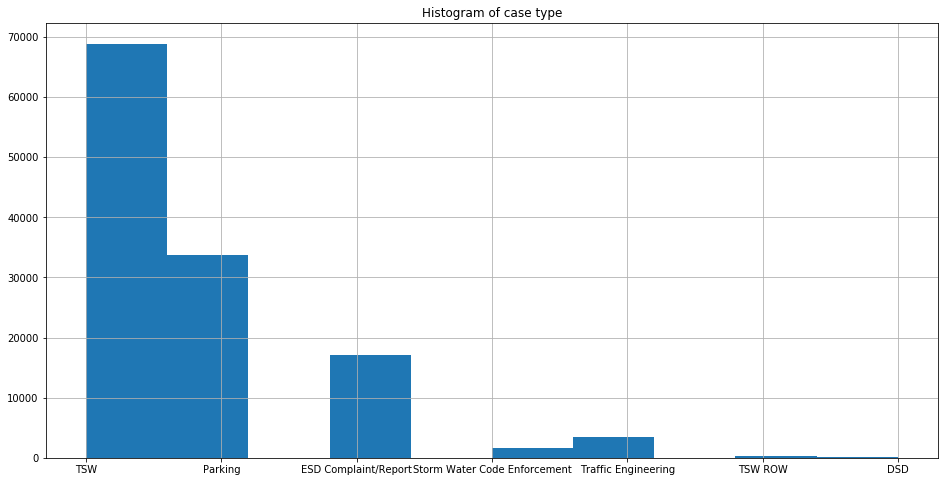

In [7]:
data['case_record_type'].hist(figsize=(16,8))
plt.title('Histogram of case type')
plt.savefig('./fig/case_type_hist.png')

In [113]:
case_type = data['case_record_type'].unique()

In [114]:
case_avg_days_per_type = [data['case_age_days'][data['case_record_type']==t].mean() for t in case_type]

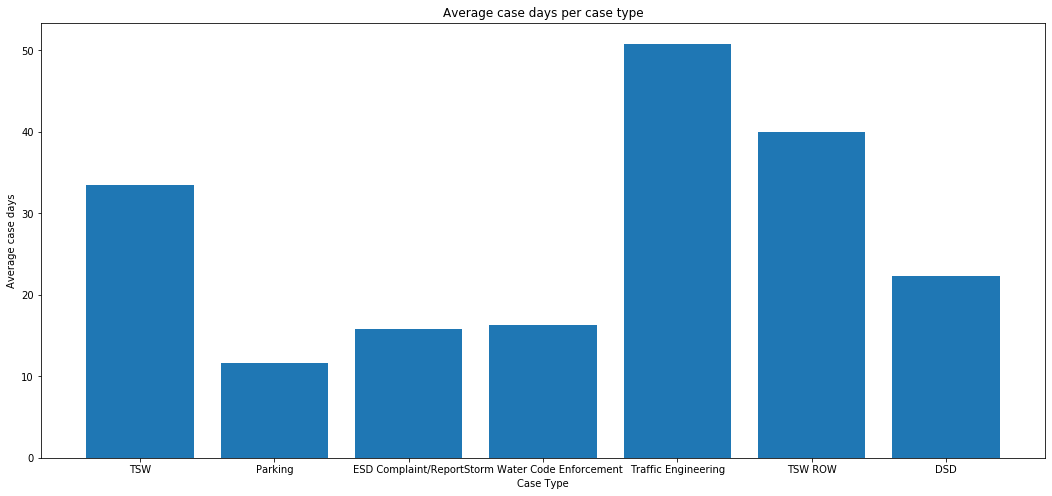

In [116]:
plt.figure(figsize=(18,8))
plt.bar(np.arange(case_type.shape[0]), case_avg_days_per_type)
plt.xlabel('Case Type')
plt.ylabel('Average case days')
plt.title('Average case days per case type')
plt.xticks(np.arange(case_type.shape[0]), tuple(case_type))
plt.savefig('./fig/avg_day_per_case_type.png')

In [117]:
case_day = data['case_age_days'].unique()

In [118]:
avg_agi_per_case_day = [data['avg_agi'][data['case_age_days']==t].mean() for t in case_day]

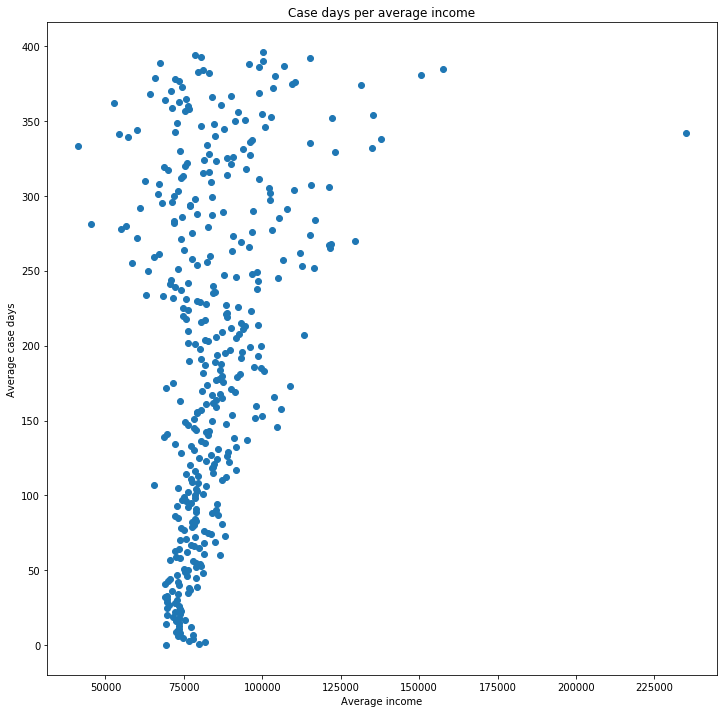

In [119]:
plt.figure(figsize=(12,12))
plt.scatter(avg_agi_per_case_day, case_day)
plt.xlabel('Average income')
plt.ylabel('Average case days')
plt.title('Case days per average income')
# plt.xticks(np.arange(case_type.shape[0]), tuple(case_type))
plt.savefig('./fig/case_day_per_avg_agi.png')

In [22]:
service_name = data['service_name'].values

In [33]:
service_str = str()
for name in service_name:
    try:
        service_str += " " + str(name)
    except:
        continue

In [34]:
from wordcloud import WordCloud

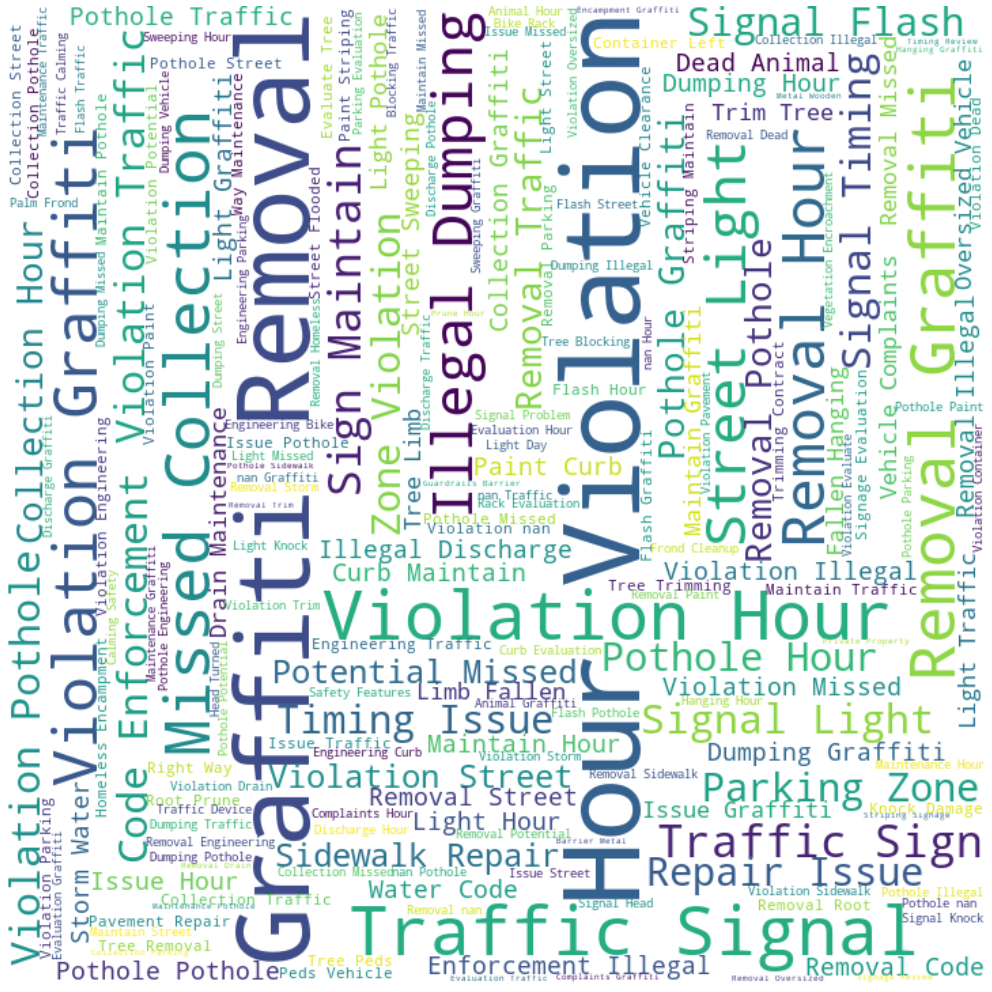

In [42]:
wordcloud = WordCloud(width=720, height=720, margin=0, background_color="white").generate(service_str)
plt.figure(figsize=(18,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('./fig/word_cloud.png')
plt.show()
